In [2]:
import re
import os
import numpy as np
import math
import pickle
import matplotlib.pyplot as plt
from nltk import FreqDist
from nltk.util import ngrams 
from zipfile import ZipFile
from kneebow.rotor import Rotor
from kneed import KneeLocator
from sklearn.feature_extraction.text import CountVectorizer

Load 2 million word corpus

In [3]:
corpus = []

archive = ZipFile('corpus2mw.zip', 'r')

fileList = archive.namelist()
for file in fileList:
    corpus.append((archive.read(file)).decode('UTF-8'))


Process text (separate special characters from words)

In [4]:
regexp = re.compile('[\w \-]') 

def processText(corpus):
    corp = []
    for text in corpus:
        listT = list(text)
        i = 0
        for  c in listT:
            if (not regexp.search(c) and not listT[i-1]==' ') or not regexp.search(listT[i-1]) and regexp.search(c):
                listT.insert(i, ' ')
            i +=1
        corp.append(''.join(listT))
    return corp

readPickle = False
if readPickle:
    with open('corpusList', 'rb') as fp:
        corpus = pickle.load(fp)
else: 
    corpus =  processText(corpus)

    with open('corpusList', 'wb') as fp:
            pickle.dump(corpus, fp)

Compute ngrams

In [5]:
def compute_freq_doc(text, minG, maxG):
   freq_dist = FreqDist()
   if len(text) > 1:
       tokens = text.strip().split()
       for i in range(minG, maxG+1):
           grams = ngrams(tokens, i)
           freq_dist.update(grams)

   return dict(freq_dist)


def compute_freq_corpus(minG, maxG):
   freq_dist = FreqDist()
   for text in corpus:
        if len(text) > 1:
            tokens = text.strip().split()
            for i in range(minG, maxG+1):
                grams = ngrams(tokens, i)
                freq_dist.update(grams)

   return dict(freq_dist)


freq_dict = compute_freq_corpus(1, 8)
filtered_dict = {' '.join(key):val for key, val in freq_dict.items() if val > 1}

In [6]:
filtered_dict_sorted= sorted(filtered_dict.items(), key=lambda x: len(x[0].split()), reverse=True)

53017
53203
53082


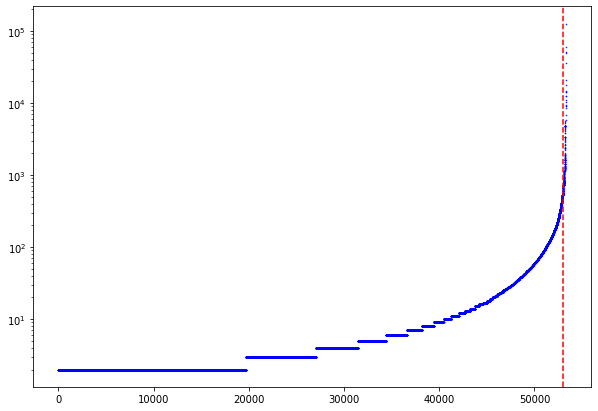

In [7]:

#unigrams
vectorizer = CountVectorizer(token_pattern=r'\w+')
vec_fit = vectorizer.fit_transform(corpus)
single_word_list = vectorizer.get_feature_names()
single_count_list = np.asarray(vec_fit.sum(axis=0))[0]
single_freq_dict = dict(zip(single_word_list,single_count_list))

single_freq_dict = {key:val for key, val in single_freq_dict.items() if val > 1}
single_freq_dict = {k: v for k, v in sorted(single_freq_dict.items(), key=lambda item: item[1])}
values = np.fromiter(single_freq_dict.values(), dtype=float)
stop_words_list = np.stack((np.arange(0, len(single_freq_dict)), values), axis = -1)
list_of_counts = list(single_freq_dict.items())


rotor = Rotor()
rotor.fit_rotate(stop_words_list)
elbow_idx = rotor.get_elbow_index()
print(elbow_idx)  
#rotor.plot_elbow()

kn = KneeLocator(stop_words_list[:,0] ,stop_words_list[:,1], curve='convex', direction='increasing')
print(int(kn.knee))

stop = 0
deltaX = 200
for idx, i, j in zip(range(0, len(values)), values, values[deltaX:]):
    if((j-i)>stop): stop = idx
print(stop)


fig = plt.figure()
ax = plt.gca()
ax.scatter(stop_words_list[:,0] ,stop_words_list[:,1] , s=1,c='blue', marker='.')
ax.set_yscale('log')
#ax.set_xscale('log')
fig.set_size_inches(10, 7)
plt.axvline(x=elbow_idx, color='r', linestyle='--')


#relev_exp_unigrams = list_of_counts[:elbow_idx] #not really necessary
stop_words_unigrams = list_of_counts[elbow_idx:]

LocalMax

In [8]:
expressions_count={}

for key, val in filtered_dict_sorted:
    expressions_count[key] = val

In [9]:
#expressions_count


In [10]:
# #unigrams
# single_freq_dict = {key:val for key, val in filtered_dict.items() if len(key.split()) == 1}
# #sort unigrams by value
# single_freq_dict = {k: v for k, v in sorted(single_freq_dict.items(), key=lambda item: item[1])}


# values = np.fromiter(single_freq_dict.values(), dtype=float)
# stop_words_list = np.stack((np.arange(0, len(single_freq_dict)), values), axis = -1)
# list_of_counts = list(single_freq_dict.items())


# rotor = Rotor()
# rotor.fit_rotate(stop_words_list)
# elbow_idx = rotor.get_elbow_index()
# print(elbow_idx)  
# #rotor.plot_elbow()

# kn = KneeLocator(stop_words_list[:,0] ,stop_words_list[:,1], curve='convex', direction='increasing')
# print(int(kn.knee))

# stop = 0
# deltaX = 200
# for idx, i, j in zip(range(0, len(values)), values, values[deltaX:]):
#     if((j-i)>stop): stop = idx
# print(stop)


# fig = plt.figure()
# ax = plt.gca()
# ax.scatter(stop_words_list[:,0] ,stop_words_list[:,1] , s=1,c='blue', marker='.')
# ax.set_yscale('log')
# #ax.set_xscale('log')
# fig.set_size_inches(10, 7)
# plt.axvline(x=elbow_idx, color='r', linestyle='--')


# relev_exp_unigrams = list_of_counts[:elbow_idx] #not really necessary
# stop_words_unigrams = list_of_counts[elbow_idx:]

# #TODO filter relevant expression dictionary if w1 or wn in stop_words_unigrams -> delete

In [11]:
stop_words=[]

for key, val in stop_words_unigrams:
    stop_words.append(key)

In [20]:
stop_words

['among',
 'great',
 'top',
 'president',
 'main',
 'february',
 'old',
 'army',
 'still',
 '18',
 'order',
 'large',
 'own',
 'last',
 'set',
 'games',
 'third',
 'death',
 'within',
 'include',
 'park',
 'st',
 'left',
 'law',
 'country',
 'built',
 'children',
 'small',
 'off',
 'village',
 'took',
 'december',
 'very',
 'november',
 '12',
 'service',
 'members',
 'football',
 'although',
 'received',
 'major',
 'final',
 '2013',
 'local',
 'five',
 '2006',
 'former',
 'could',
 'did',
 'held',
 'due',
 'party',
 'another',
 'along',
 'single',
 'church',
 'show',
 'public',
 'place',
 'april',
 'back',
 'british',
 'around',
 '2007',
 '2012',
 'college',
 'named',
 'january',
 'club',
 'june',
 'october',
 'best',
 'member',
 'july',
 'song',
 'began',
 'august',
 'york',
 'century',
 'river',
 'east',
 'age',
 'located',
 'because',
 '2009',
 'like',
 'long',
 'march',
 'found',
 'home',
 'september',
 'line',
 '2011',
 'station',
 '2008',
 'end',
 'international',
 'system',
 'ba

In [13]:
def dice(freq, pref_freqs, suff_freqs):
    pref_freqs = list(pref_freqs)
    suff_freqs = list(suff_freqs)
    return 2 * freq / (sum(pref_freqs) / len(pref_freqs) + sum(suff_freqs) / len(suff_freqs))


def scp(freq, pref_freqs, suff_freqs):
    multiplied_freqs = [pref_freq * suff_freq for pref_freq, suff_freq in zip(pref_freqs, suff_freqs)]
    return freq ** 2 * len(multiplied_freqs) / sum(multiplied_freqs)

In [14]:
poss_re={}

for key, val in filtered_dict_sorted:
    words= key.split()
    n= len(words)
    #print(n)
    if len(words) > 2:    
        ownpref=''
        ownsuf=''
        for i in range(0,n):
            if i==0:
                ownpref += key.split(' ')[i]
            elif i==n-1:
                ownsuf += key.split(' ')[i]
            else:
                ownpref += ' ' + key.split(' ')[i]
                ownsuf += key.split(' ')[i] + ' '
        xpref= expressions_count[ownpref]
        xsuf= expressions_count[ownsuf]
        scpg= val**2 /(xpref * xsuf)
        diceg = 2 * val / (xpref + xsuf)

        poss_re[key] = {'n':n,  'freq': val, 'scpg': scpg, 'diceg': diceg,'xpref': ownpref, 'xsuf': ownsuf}
        
    
#x = best glue from n-1 words


In [24]:
points=['.',',','?','(',')','!','@','&','^','~','|','>','<', '%', '$', '[', ']', '{', '}', ':', ';', '-','a','s', '_', '+', '=', '*', '\\', '\'', '\"', '`', '#', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '/', '-']
relevant_expressions={}
res=[]

for key, val in poss_re.items():
    if val['n'] in range(3,7):
        words = key.split()
        if words[0].lower() in stop_words:
            continue
        if words[-1].lower() in stop_words:
            continue
        if val['freq'] <= 2:
            continue
        grams = key.split()
        puntcount = 0
        for g in grams:
            if g in points:
                puntcount+=1
        if puntcount!=0:
            continue
        #best x
        try:
            xpref = poss_re[val['xpref']]['scpg']
            xsuf = poss_re[val['xsuf']]['scpg']
            bestxscp = max(xpref, xsuf)
            
            xpref = poss_re[val['xpref']]['diceg']
            xsuf = poss_re[val['xsuf']]['diceg']
            bestxdice = max(xpref, xsuf)
        except:
            continue
        
        
        #best y
        bestyscp=1    
        for keyy, valy in poss_re.items():
            if key in keyy and valy['n'] == val['n']+1:
                if valy['scpg']<bestyscp:
                    bestyscp=valy['scpg']
                    
        bestydice=1    
        for keyy, valy in poss_re.items():
            if key in keyy and valy['n'] == val['n']+1:
                if valy['diceg']<bestydice:
                    bestydice=valy['diceg']

        #see if is relevant
        if val['scpg']>(bestxscp+bestyscp)/2 and val['diceg']>(bestxdice+bestydice)/2:
            print(key)
            relevant_expressions[key]={'n':val['n'], 'freq': val['freq'], 'scpg': val['scpg'], 'xscp':bestxscp, 'yscp':bestyscp, 'diceg': val['diceg'], 'xdice':bestxdice, 'ydice':bestydice}
            res.append(key)
        

inducted into the College Football Hall
Hispanic or Latino of any race
According to the United States Census
65 years of age or older
households were made up of individuals
female householder with no husband present
those under the age of eighteen
included in the Southeast Slovenia statistical
US Airways and US Airways Express
male householder with no wife present
coaches poll which had them ranked
climate in this area is characterized
Starlings are small to medium-sized passerine
– first performed by the BBC
placed on the 15-day disabled list
via KO in the first round
extreme battlefield bravery or successful military
battlefield bravery or successful military leadership
Bishop of the Roman Catholic Diocese
fleet consists of the following aircraft
ship of the United States Navy
Amendment to the United States Constitution
natural habitats are subtropical or tropical
subtropical or tropical moist montane forests
Bay City Electric Light and Power
trains per hour in each direction
subtrop

In [ ]:
res

In [ ]:
with open('REList', 'wb') as fp:
    pickle.dump(relevant_expressions, fp)
   
with open('REList', 'rb') as fp:
    relevant_expressions = pickle.load(fp)

Explicit and Implicit Keywords

In [ ]:
def count_RE_in_doc(RE):
    count = 0
    for text in corpus:
        if RE in text:
            count += 1
    
    return count

def freq(RE,doc):
    freq_dict = compute_freq_doc(doc, len(RE.split()), len(RE.split()))
    if len(RE.split()) > 1:
        freq_dict = {' '.join(key):val for key, val in freq_dict.items()}
    else:
        freq_dict = {''.join(key):val for key, val in freq_dict.items()}
    return freq_dict[RE]


def tf_idf(RE, doc_idx):
    doc = corpus[doc_idx]
    
    freq_RE = freq(RE,doc)
    
    return (freq_RE/len(doc.strip().split()))*math.log(len(corpus)/count_RE_in_doc(RE))

def findWholeWord(w):
    return re.compile(r'\b({0})\b'.format(w)).search

def calc_prob(word):
    sum_p = 0
    for doc in corpus:
        if findWholeWord(word)(doc): 
            sum_p += freq(word, doc)/len(doc.strip().split())
    return (1/len(corpus))*sum_p

def calc_cov(A,B):
    probA = calc_prob(A)
    probB = calc_prob(B)
    sum_p = 0
    for doc in corpus:
        if findWholeWord(A)(doc) and findWholeWord(B)(doc):
            sum_p += (freq(A, doc)/len(doc.strip().split())-probA)*(freq(B, doc)/len(doc.strip().split())-probB)
    
    return (1/(len(corpus)-1))*sum_p

def correlation(A,B):
    return calc_cov(A, B)/(math.sqrt(calc_cov(A, A))*math.sqrt(calc_cov(B, B)))

def get_distances(A,B,doc):
    closest = 0
    farthest = 0
    
    listA = A.split()
    listB = B.split()
    listDoc = doc.strip().split()
    
    idx_pos_A_1 = [ i for i in range(len(listDoc)) if listDoc[i] == listA[0] ]
    idx_pos_A_2 = [ i for i in range(len(listDoc)) if listDoc[i] == listA[-1] ]
    idx_pos_B_1 = [ i for i in range(len(listDoc)) if listDoc[i] == listB[0] ]
    idx_pos_B_2 = [ i for i in range(len(listDoc)) if listDoc[i] == listB[-1] ]
    
    idx_pos_A_1_copy = idx_pos_A_1
    idx_pos_A_2_copy = idx_pos_A_2
    idx_pos_B_1_copy = idx_pos_B_1
    idx_pos_B_2_copy = idx_pos_B_2
    
    for pos, idx in enumerate(idx_pos_A_1_copy):
        for i, elem in enumerate(listA):
            if listDoc[idx+i] != elem:
                    idx_pos_A_1.pop(pos)
                    break
                
    for pos, idx in enumerate(idx_pos_A_2_copy):
        for i, elem in enumerate(reversed(listA)):
            if listDoc[idx-i] != elem:
                    idx_pos_A_2.pop(pos)  
                    break
                           
    for pos, idx in enumerate(idx_pos_B_1_copy):
        for i, elem in enumerate(listB):
            if listDoc[idx+i] != elem:
                    idx_pos_B_1.pop(pos) 
                    break
            
                
    for pos, idx in enumerate(idx_pos_B_2_copy):
        for i, elem in enumerate(reversed(listB)):
            if listDoc[idx-i] != elem:
                    idx_pos_B_2.pop(pos)    
                    break
    
    listF = list(np.ma.concatenate([np.subtract(idx_pos_A_1,idx_pos_B_2),np.subtract(idx_pos_B_1,idx_pos_A_2)]))
    listF = [ i for i in listF if i > -1 ]

    return min(listF)/max(listF)
  
def IP(A,B):
    count = 0
    sum_dist = 0 
    for i, doc in enumerate(corpus):
        if findWholeWord(A)(doc) and findWholeWord(B)(doc):
            count += 1
            sum_dist += get_distances(A, B, doc)
        
    return 1-(1/count)*sum_dist
        
       
def sem_prox(A,B):
    return correlation(A, B)*math.sqrt(IP(A,B))

def occur_in_any_doc(A,B):
    for doc in corpus:
        if findWholeWord(A)(doc) and findWholeWord(B)(doc):
            return True
    return False

def calc_comp_medio(RE):
    count = 0
    listRE = RE.split()
    for w in listRE:
        count += len(w)
    return count/len(listRE)
    
def score_explicit(doc_idx):
    doc = corpus[doc_idx]
   
    #unigrams
    uni_dict = compute_freq_doc(doc, 1, 1)
    uni_dict = {''.join(key):val for key, val in uni_dict.items()}

    for k in uni_dict.keys():
        uni_dict[k] = tf_idf(k,doc_idx) * calc_comp_medio(k)
    top5_uni = dict(sorted(uni_dict.items(), key=lambda x: x[1], reverse=True)[:5])
    #relevant expressions
    re_dict = {}
    for k in relevant_expressions.keys():
        if k in doc:
            re_dict[k] = relevant_expressions[k]['glue']
    
    
    for k in re_dict.keys():
        re_dict[k] = tf_idf(k,doc_idx) * calc_comp_medio(k)
    top5_re = dict(sorted(re_dict.items(), key=lambda x: x[1], reverse=True)[:5])
    
    return top5_uni , top5_re if len(re_dict) != 0 else 'No REs in the document'
    
def score_implicit(doc_idx):
    doc = corpus[doc_idx]
    #relevant expressions
    re_dict_in = {}
    re_dict_out = {}
    for k in relevant_expressions.keys():
        if k in doc:
            re_dict_in[k] = relevant_expressions[k]['glue']
        else:
            re_dict_out[k] = relevant_expressions[k]['glue']
    
    if len(re_dict_in) == 0: return 'No REs in the document'
    
    for k in re_dict_in.keys():
        re_dict_in[k] = tf_idf(k,doc_idx) * calc_comp_medio(k)
    top10_re = dict(sorted(re_dict_in.items(), key=lambda x: x[1], reverse=True)[:10])
    
    scores = {}
    for k in re_dict_out.keys():
        score = 0
        for i, v in enumerate(top10_re):
            if occur_in_any_doc(k, v):
                score += sem_prox(k, v)/(i+1)
        scores[k] = score
    top10_scores = dict(sorted(scores.items(), key=lambda x: x[1], reverse=True)[:10])
    return top10_scores

In [ ]:
print(score_explicit(2))    
print(score_implicit(2))

({'PricewaterhouseCoopers': 0.22796157691837088, 'integrative': 0.22796157691837088, 'Randolph': 0.22393010018965329, 'qigong': 0.2159411323537057, 'criticizing': 0.1919951031822125}, 'No REs in the document')
No REs in the document
